##Data

For this programming assignment, you will be working with the Wisconsin Breast Cancer dataset. This dataset contains various measurements of the size and shape of tumors, along with the diagnosis of the tumor as benign or malignant. Further information on this dataset can be found here: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic).

Our goal is to train a model that can use the measurements of a tumor to diagnosis it as benign or malignant.

We start by loading the dataset into a pandas dataframe.

In [ ]:
import pandas as pd

cancer_df = pd.read_csv("https://github.com/lynn0032/MLCamp2021/raw/main/breast_cancer.csv")

Next, we look at a summary of the data. Note that not every column is shown in this summary; this dataset has more attributes than those we've previously worked with.

In [ ]:
cancer_df.describe(include = "all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


We can use shape to check the size of the data. Here, we see that we have 569 samples (for 569 tumors), and 33 attributes.

In [ ]:
cancer_df.shape

(569, 33)

Normally, we'd do exploratory data analysis here to understand the distribution of the dataset. For this programming assignment, however, we're going to focus on evaluation for a classifier, so we will neglect to do that here.

There are two columns that we won't use for prediction, so we drop those columns.

In [ ]:
cancer_df.drop(["id", "Unnamed: 32"], axis=1, inplace = True)

cancer_df.describe(include="all")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


Next, we separate the dataset into features and target. Remember that the diagnosis is the target, and it takes values "M" (for malignant) and "B" for benign.

In [ ]:
features = list(cancer_df.columns)
features.remove("diagnosis")

X = cancer_df[features].values
y = cancer_df["diagnosis"].values

## Task 1: Evaluation for multiple random testing-training splits (5 points)

First, we import the functions that we'll use to train and evaluate models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

To see how a decision tree (with default parameter values) performs on this data, we will generate random testing training splits in repeated trials, and average the performance.

Complete the code cell below, to set up this experiment.
*   We will run 10 trials, generating 10 different training-testing splits.
*   For each trial, we generate a new training-testing split, train a model on the training set, and evaluate it on the testing set.
*   Each training-testing split should use 75% of the data for training (then how much is used for testing?), and for a random state, use the value of the variable `iter` (giving the trial number).
*   Create a decision tree classifier with random state 189, and train it on the training data.
*   Make predictions for the testing set
*   Compute the accuracy, precision, and recall for your model on the testing data, and append these to the lists storing these results. Use "M" as the positive class.
*   For precision and recall, you will need to use an optional parameter, `pos_label`, to specify the label for the positive class ("M").

In [ ]:
num_trials = 10

accuracy = []
precision = []
recall = []
positive_class_label = "M"

for iter in range(num_trials):
  # perform a random split
  X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=iter)


  # train classifier on the training data
  clf= DecisionTreeClassifier(random_state = 189)
  clf.fit(X_train, y_train)


  # make predictions on the testing data
  y_pred= clf.predict(X_test)


  # compute and store the performance metrics
  accuracy.append(accuracy_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred, pos_label=positive_class_label))
  recall.append(recall_score(y_test, y_pred, pos_label=positive_class_label))



# report the performance
print("Average Accuracy:", sum(accuracy)/len(accuracy))
print("Average Precision:", sum(precision)/len(precision))
print("Average recall:", sum(recall)/len(recall))
print("Accuracy:", accuracy)
print("Precision", precision)
print("Recall", recall)

Average Accuracy: 0.9237762237762237
Average Precision: 0.8990194472768304
Average recall: 0.9046547851411223
Accuracy: [0.9020979020979021, 0.958041958041958, 0.916083916083916, 0.9300699300699301, 0.8951048951048951, 0.958041958041958, 0.8951048951048951, 0.9370629370629371, 0.9020979020979021, 0.9440559440559441]
Precision [0.819672131147541, 0.9803921568627451, 0.8548387096774194, 0.9056603773584906, 0.8, 0.9622641509433962, 0.9047619047619048, 0.9285714285714286, 0.8928571428571429, 0.9411764705882353]
Recall [0.9433962264150944, 0.9090909090909091, 0.9464285714285714, 0.9056603773584906, 0.9166666666666666, 0.9272727272727272, 0.8636363636363636, 0.8666666666666667, 0.8620689655172413, 0.9056603773584906]


In [ ]:
num_trials = 10

accuracy = []
precision = []
recall = []

for iter in range(num_trials):
  # perform a random split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = iter)

  # train classifier on the training data
  clf = DecisionTreeClassifier(random_state = 7)
  clf.fit(X_train, y_train)

  # make predictions on the testing data
  y_pred = clf.predict(X_test)

  # compute and store the performance metrics
  accuracy.append(accuracy_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred))
  recall.append(recall_score(y_test, y_pred))

# report the performance
print("Average Accuracy:", sum(accuracy)/len(accuracy))
print("Average Precision:", sum(precision)/len(precision))
print("Average recall:", sum(recall)/len(recall))
print("Accuracy:", accuracy)
print("Precision", precision)
print("Recall", recall)

Average Accuracy: 0.7720670391061453
Average Precision: 0.7274461160410047
Average recall: 0.6792301454954947
Accuracy: [0.8156424581005587, 0.7318435754189944, 0.7653631284916201, 0.770949720670391, 0.8268156424581006, 0.7932960893854749, 0.7597765363128491, 0.7486033519553073, 0.7877094972067039, 0.7206703910614525]
Precision [0.7903225806451613, 0.7049180327868853, 0.7846153846153846, 0.6883116883116883, 0.7636363636363637, 0.7540983606557377, 0.6575342465753424, 0.7, 0.7323943661971831, 0.6986301369863014]
Recall [0.7101449275362319, 0.589041095890411, 0.6455696202531646, 0.7571428571428571, 0.7, 0.6764705882352942, 0.7272727272727273, 0.6086956521739131, 0.7323943661971831, 0.6455696202531646]


In [ ]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(accuracy[3:6] == [0.9300699300699301, 0.8951048951048951, 0.958041958041958])
assert(precision[7:10] == [0.9285714285714286, 0.8928571428571429, 0.9411764705882353])
assert(recall[-3:] == [0.8666666666666667, 0.8620689655172413, 0.9056603773584906])
print("Tests passed, but be sure to test your own code as well!")

Tests passed, but be sure to test your own code as well!


## Task 2: Interpreting Your Results (2 points)

In the cell below, for precision and recall, write one sentence each describing what these mean in the context of the models and dataset. As an example, here is such a sentence for accuracy:

Of all the tumors in the dataset, our models classified an average of 91.8% of tumors correctly as malignant or benign.

your answers here

Of all the tumors that the model had predicted as malignant, an average of 72.7% were actually the once that were malignant.

Of all the tumors that were actually malignant, an average of about 67% were the once that has been predicted as malignant.

## Task 3: Evaluation Function (4 points)

For this task, you will complete the definition of an evaluation function that can be used to evaluate the performance of a decision tree with specified values for the parameters `max_depth` and `min_samples_leaf`. We will use stratified $k$-fold cross-validation, to help ensure that our results are reliable.

*   Use stratified $k$-fold validation, with $k=5$. Remember to shuffle the data, and use a random state of 7.
*   For each split, you will train a decision tree classifier with the the values of `max_depth` and `min_samples_leaf` given by the function parameters. Use random state 7.
*   For each model trained, you will compute and store the accuracy on the testing set and the accuracy on the training set. The function returns the average testing accuracy and the average training accuracy.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def evaluate(max_depth_value, min_samples_leaf_value):
  # Use stratified 5-fold evaluation to generate splits
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
  skf.get_n_splits(X,y)

  test_accuracy = []
  train_accuracy = []

  # for each split
  for train_index, test_index in skf.split(X, y):
    # Get training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state= 7,max_depth=max_depth_value, min_samples_leaf=min_samples_leaf_value)
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_test_pred = clf.predict(X_test)

    # Make predictions on the training set
    y_train_pred = clf.predict(X_train)

    # Evaluate the performance
    test_accuracy.append(accuracy_score(y_test, y_test_pred))
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

  return sum(test_accuracy)/len(test_accuracy), sum(train_accuracy)/len(train_accuracy)
print(evaluate(10,2))
print(evaluate(4,10))


(0.9227138643067848, 0.9890138808559861)
(0.9139108834031984, 0.9617765567765568)


In [ ]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(evaluate(10,2) == (0.9227138643067848, 0.9890138808559861))
assert(evaluate(4,10) == (0.9139108834031984, 0.9617765567765568))
assert(evaluate(4,1) == (0.9262381617761217, 0.9859417775207249))
assert(evaluate(None,20) == (0.9104642136314236, 0.945080971659919))
print("Tests passed, but be sure to test your own code as well!")

Tests passed, but be sure to test your own code as well!


## Task 4: Tuning `max_depth` (1 point)

Now, we will use the evaluate function to tune the parameter `max_depth`, with the default value for `min_samples_leaf` (which is 1). The code is provided for you, but you will need to interpret the results.



In [ ]:
test_accuracies = []
train_accuracies = []

for max_depth in range(1,20):
  test_acc, train_acc = evaluate(max_depth, 1)
  test_accuracies.append(test_acc)
  train_accuracies.append(train_acc)

  print("Max depth", max_depth)
  print("\tTesting Accuracy:", test_acc)
  print("\tTraining Accuracy:", train_acc)

Max depth 1
	Testing Accuracy: 0.8875795683900014
	Training Accuracy: 0.9248689030267979
Max depth 2
	Testing Accuracy: 0.9051544791181494
	Training Accuracy: 0.9556227106227105
Max depth 3
	Testing Accuracy: 0.9244527247321844
	Training Accuracy: 0.9718806631964526
Max depth 4
	Testing Accuracy: 0.9226983387672721
	Training Accuracy: 0.986818970503181
Max depth 5
	Testing Accuracy: 0.9279925477410339
	Training Accuracy: 0.9920917678812415
Max depth 6
	Testing Accuracy: 0.9104176370128861
	Training Accuracy: 0.9964854443801812
Max depth 7
	Testing Accuracy: 0.9139108834031984
	Training Accuracy: 0.9991208791208791
Max depth 8
	Testing Accuracy: 0.9104021114733737
	Training Accuracy: 1.0
Max depth 9
	Testing Accuracy: 0.9104021114733737
	Training Accuracy: 1.0
Max depth 10
	Testing Accuracy: 0.9104021114733737
	Training Accuracy: 1.0
Max depth 11
	Testing Accuracy: 0.9104021114733737
	Training Accuracy: 1.0
Max depth 12
	Testing Accuracy: 0.9104021114733737
	Training Accuracy: 1.0
Max d

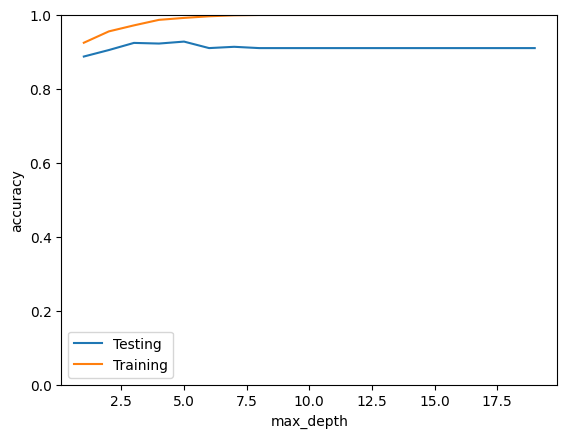

In [ ]:
import matplotlib.pyplot as plt

test = plt.plot(range(1,20), test_accuracies, label = "Testing")
train = plt.plot(range(1,20), train_accuracies, label = "Training")
plt.ylim(0, 1)      # to "zoom in", you can delete this line
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In the text cell below, describe these results. Be sure to discuss overfitting vs. underfitting, as well as which value for `max_depth` you think is best and why.

your answer here

## Task 5: Tuning `min_samples_leaf` (1 point)

Next, we will use the evaluate function to tune the parameter `min_samples_leaf`, with the default value for `max_depth` (which is `None`). The code is provided for you, but you will need to interpret the results.

In [ ]:
test_accuracies = []
train_accuracies = []

for min_samples_leaf in range(1,100):
  test_acc, train_acc = evaluate(None, min_samples_leaf)
  test_accuracies.append(test_acc)
  train_accuracies.append(train_acc)

  print("Min samples leaf", min_samples_leaf)
  print("\tTesting Accuracy:", test_acc)
  print("\tTraining Accuracy:", train_acc)

Min samples leaf 1
	Testing Accuracy: 0.9262071106970968
	Training Accuracy: 1.0
Min samples leaf 2
	Testing Accuracy: 0.9227138643067848
	Training Accuracy: 0.9890138808559861
Min samples leaf 3
	Testing Accuracy: 0.92094395280236
	Training Accuracy: 0.9846230962020435
Min samples leaf 4
	Testing Accuracy: 0.9209594783418724
	Training Accuracy: 0.979793715056873
Min samples leaf 5
	Testing Accuracy: 0.9192050923769601
	Training Accuracy: 0.9762781954887219
Min samples leaf 6
	Testing Accuracy: 0.912187548517311
	Training Accuracy: 0.9727626759205708
Min samples leaf 7
	Testing Accuracy: 0.9174507064120478
	Training Accuracy: 0.9705668016194332
Min samples leaf 8
	Testing Accuracy: 0.9156963204471354
	Training Accuracy: 0.9692481203007519
Min samples leaf 9
	Testing Accuracy: 0.9192050923769601
	Training Accuracy: 0.9644129554655871
Min samples leaf 10
	Testing Accuracy: 0.9139108834031984
	Training Accuracy: 0.9617765567765568
Min samples leaf 11
	Testing Accuracy: 0.9191740412979351


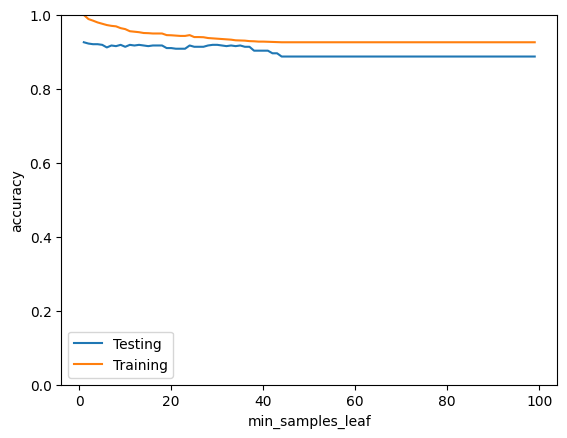

In [ ]:
import matplotlib.pyplot as plt

test = plt.plot(range(1,100), test_accuracies, label = "Testing")
train = plt.plot(range(1,100), train_accuracies, label = "Training")
plt.ylim(0, 1)      # to "zoom in", you can delete this line
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In the text cell below, describe these results. Be sure to discuss overfitting vs. underfitting, as well as which value for `min_samples_leaf` you think is best and why.

your answer here

## Task 6: Best Combination (5 points)

When tuning parameters, it typically takes more effort than just tuning parameters individually. Really, we want the best combination of parameters, so we want to explore them together. One way to do this is with a **grid search**, where we explore a grid of possible parameter values. In the cell below, you will conduct a grid search to find the best combination of `max_depth` and `min_samples_leaf`.
*   Using nested `for` loops, use the function `evaluate` to test all combinations of `max_depth` and `min_samples_leaf`, where `max_depth` ranges from 1 through 10, and `min_samples_leaf` ranges from 1 through 50 (can you see how I chose these ranges from the results for the individual parameters above?).
*   Remember that the function `evaluate` returns both the testing accuracy and training accuracy. For simplicity, we will just look for the parameters with the **best testing accuracy**.
*   For the parameters with the best testing accuracy, store their values in the tuple `parameters` (with `max_depth` first, followed by `min_samples_leaf`). Store their testing accuracy and training accuracy (as found by by evaluate), in the tuple `best_metrics`.

The grid search should take a couple of minutes to run. Because it can be time consuming, it is not always possible to run a grid search for big datasets with complex models.

In [ ]:
from tables.array import Leaf
best_metrics = (0,0)
parameters = (0,0)

for max_depth in range(1,11):
  for min_samples_leaf in range(1,51):
    training_accuracy, best_testing_accuracy = evaluate(max_depth, min_samples_leaf)
    if training_accuracy > best_metrics[0]:
      best_metrics = (training_accuracy, best_testing_accuracy)
      parameters = (max_depth, min_samples_leaf)


print("Best max_depth:", parameters[0])
print("Best min_samples_leaf:", parameters[1])
print("Testing Accuracy:", best_metrics[0])
print("Training Accuracy:", best_metrics[1])

Best max_depth: 3
Best min_samples_leaf: 9
Testing Accuracy: 0.9315013196708584
Training Accuracy: 0.9578214767688452


In [ ]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(best_metrics == (0.9315013196708584, 0.9578214767688452))
print("Tests passed, but be sure to test your own code as well!")

Tests passed, but be sure to test your own code as well!


# Task 7: Training a final model (2 points)

Now that we have identified the optimal parameter values, we will train a final model on all of the data, using those parameters values. The idea is that this final model would be used to diagnose tumors.

Although we were able to find the optimal parameter values for decision trees, there are other machine learning models that can have even better performance on this dataset. Unfortunately, we don't have time to cover more in this course.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=parameters[0], min_samples_leaf=parameters[1], random_state = 0)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=9, random_state=0)

Next, we visualize the decision tree that we produced, so that we can see how it makes decisions.

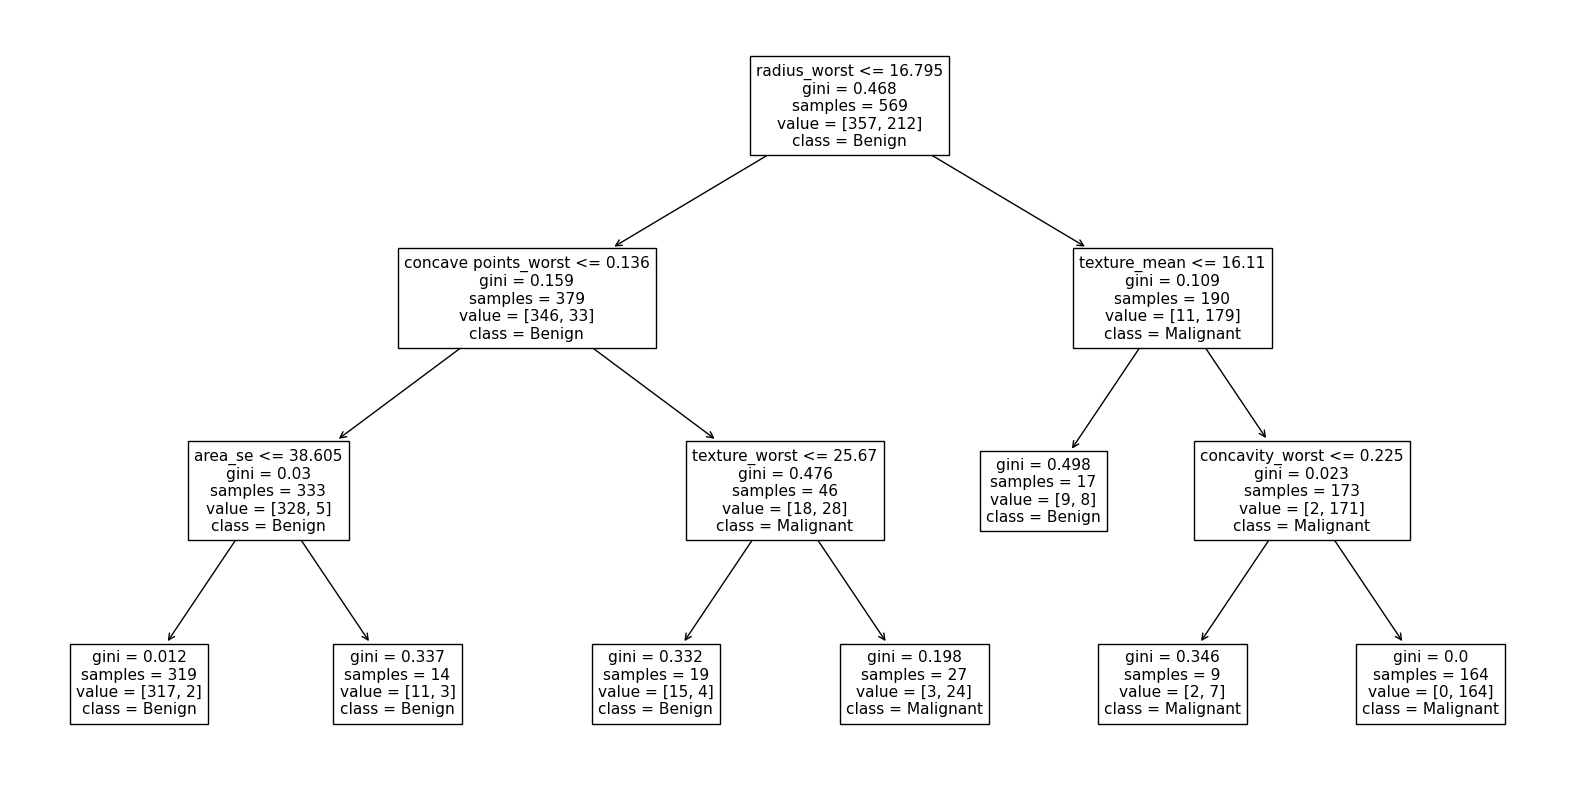

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names = features, class_names = ["Benign", "Malignant"])
plt.show()

Suppose we encounter a new tumor, with values:
*   `area_se = 35.021`
*   `concave_points_worst = 0.100`
*   `concavity_worst = .238`
*   `radius_worst = 17.106`
*   `texture_mean = 15.987`
*   `texture_worst = 26.832`

How would the decision tree model classify this tumor? Explain your answer by describing the path this datapoint takes through the tree.

your answer here

Since the radius_worst is greater than 16.795, it goes to the right then, since the texture_mean is less than 16.11, we go to the right, then the final decsion we get is that its benign.

Suppose we encounter a new tumor, with values:
*   `area_se = 39.542`
*   `concave_points_worst = 0.154`
*   `concavity_worst = .221`
*   `radius_worst = 16.234`
*   `texture_mean = 16.785`
*   `texture_worst = 25.979`

How would the decision tree model classify this tumor? Explain your answer by describing the path this datapoint takes through the tree.

your answer here

Since the radius_worst is less than 16.795, we go to the right, then since the concave_points_worst is greater than 0.136, we go to the left and then since the texture_worst is greater than 25.67, we go to the right. The final descion we get is that its malignant.